# Study of hotel reservations data base

## Importing and exploration of the data frame

In [1]:
#Setting libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Import dataframe
df = pd.read_csv (r'C:\Python3\Scripts\hotel_bookings.csv', delimiter = ',')

In [3]:
#Data Exploration:
df.shape

(119390, 32)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [5]:
df.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


## Data preprocessing: Starting Step 

### Missing Data Analysis 

In [6]:
# find missing information
print('Is there missing data in the data frame:', df.isnull().values.any())

print('The columns that have missing data are:', df.columns[df.isnull().any()])        

#count number of missing values and specify how many in each column:
print('The number of missing data is:', df.isnull().sum().sum())

Is there missing data in the data frame: True
The columns that have missing data are: Index(['children', 'country', 'agent', 'company'], dtype='object')
The number of missing data is: 129425


In [7]:
print('The number of missing data in Children column is:', df['children'].isnull().sum().sum())
print('The number of missing data in Country column is:', df['country'].isnull().sum().sum())
print('The number of missing data in Agent column is:', df['agent'].isnull().sum().sum())
print('The number of missing data in Company column is:', df['company'].isnull().sum().sum())

The number of missing data in Children column is: 4
The number of missing data in Country column is: 488
The number of missing data in Agent column is: 16340
The number of missing data in Company column is: 112593


In [8]:
# replace missing data by the right value
df['children'].fillna('0.0', inplace=True)
df['country'].fillna('UNK', inplace=True)
df['agent'].fillna('0.0', inplace=True)
df['company'].fillna('0.0', inplace=True)

### Study of correlation between Cancellation and rest of parameters to determine the features to keep  

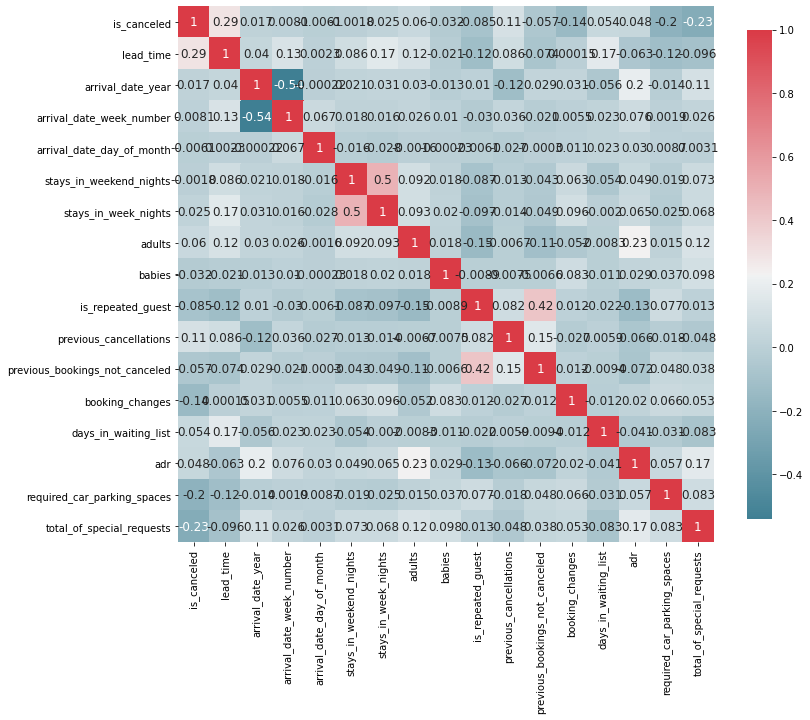

In [9]:
# We will use a plot correlation map to highlight the most effective data to use in our study

def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }

        )
    
plot_correlation_map(df)

### Dropping irrelevant data based on needs   

In [ ]:
#Based on the plto we will drop the least relevant in-puts in determining the status of a booking:
#We will keep the inputs with at least 5% correlation with cancelled status:

In [10]:
df.drop(['arrival_date_year'], axis='columns', inplace=True)

In [11]:
df.drop(['reserved_room_type'], axis='columns', inplace=True)

In [12]:
df.drop(['assigned_room_type'], axis='columns', inplace=True)

In [13]:
df.drop(['adr'], axis='columns', inplace=True)

In [14]:
df.drop(['arrival_date_month'], axis='columns', inplace=True)

In [15]:
df.drop(['reservation_status'], axis='columns', inplace=True)

In [16]:
df.drop(['arrival_date_week_number'], axis='columns', inplace=True)

In [17]:
df.drop(['arrival_date_day_of_month'], axis='columns', inplace=True)

In [18]:
df.drop(['stays_in_weekend_nights'], axis='columns', inplace=True)

In [19]:
df.drop(['stays_in_week_nights'], axis='columns', inplace=True)

In [20]:
df.drop(['children'], axis='columns', inplace=True)

In [21]:
df.drop(['babies'], axis='columns', inplace=True)

In [22]:
df.drop(['meal'], axis='columns', inplace=True)

In [23]:
df.drop(['country'], axis='columns', inplace=True)

In [24]:
df.drop(['market_segment'], axis='columns', inplace=True)

In [25]:
df.drop(['distribution_channel'], axis='columns', inplace=True)

In [26]:
df.drop(['deposit_type'], axis='columns', inplace=True)

In [27]:
df.drop(['agent'], axis='columns', inplace=True)

In [28]:
df.drop(['company'], axis='columns', inplace=True)

In [29]:
df.drop(['reservation_status_date'], axis='columns', inplace=True)

In [30]:
df.drop(['required_car_parking_spaces'], axis='columns', inplace=True)

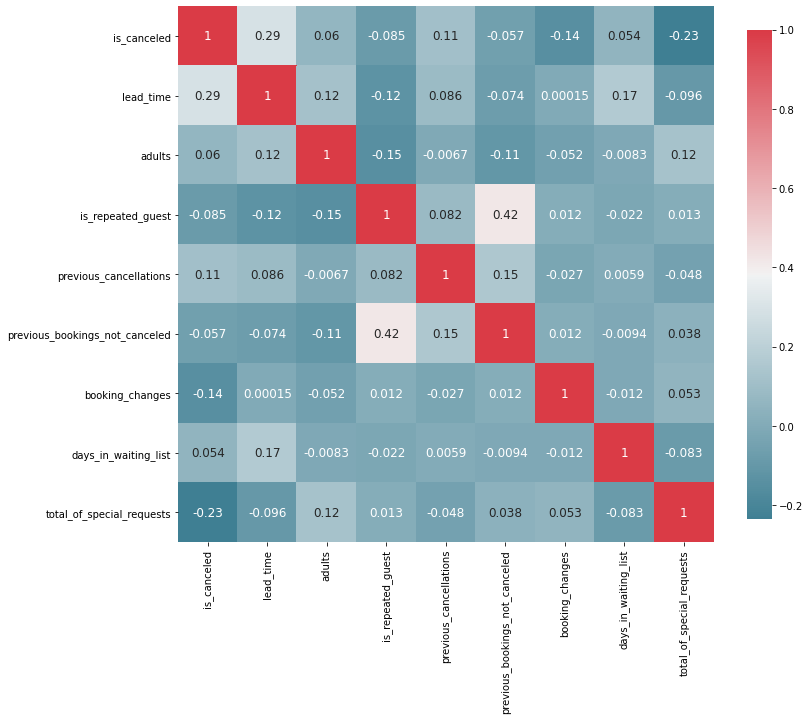

In [31]:
# We reconfirm the data we celected with a plot correlation map 

def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }

        )
    
plot_correlation_map(df)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 11 columns):
 #   Column                          Non-Null Count   Dtype 
---  ------                          --------------   ----- 
 0   hotel                           119390 non-null  object
 1   is_canceled                     119390 non-null  int64 
 2   lead_time                       119390 non-null  int64 
 3   adults                          119390 non-null  int64 
 4   is_repeated_guest               119390 non-null  int64 
 5   previous_cancellations          119390 non-null  int64 
 6   previous_bookings_not_canceled  119390 non-null  int64 
 7   booking_changes                 119390 non-null  int64 
 8   days_in_waiting_list            119390 non-null  int64 
 9   customer_type                   119390 non-null  object
 10  total_of_special_requests       119390 non-null  int64 
dtypes: int64(9), object(2)
memory usage: 10.0+ MB


In [33]:
df.shape

(119390, 11)

In [34]:
df.head(5)

,hotel,is_canceled,lead_time,adults,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,customer_type,total_of_special_requests
0,Resort Hotel,0,342,2,0,0,0,3,0,Transient,0
1,Resort Hotel,0,737,2,0,0,0,4,0,Transient,0
2,Resort Hotel,0,7,1,0,0,0,0,0,Transient,0
3,Resort Hotel,0,13,1,0,0,0,0,0,Transient,0
4,Resort Hotel,0,14,2,0,0,0,0,0,Transient,1


### Conversion of the categorical features into numerical data

In [35]:
#convert Hotel: 1 = Resort ; 0 = City Hotel
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['hotel'] = encoder.fit_transform (df['hotel'])

In [36]:
#convert customer_type using One-hot encoding to get a database with dummy features representing each cutomer type
customer_type_convert = pd.get_dummies(df['customer_type'])

In [37]:
customer_type_convert.head(5)

,Contract,Group,Transient,Transient-Party
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0


In [38]:
customer_type_convert.shape

(119390, 4)

In [39]:
#attaching the newly created database to our main database as a replacement for the customer_type feature
#we will use the index as reference to reattach both databases with the concatination method:
df = pd.concat([df, customer_type_convert], axis=1)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 15 columns):
 #   Column                          Non-Null Count   Dtype 
---  ------                          --------------   ----- 
 0   hotel                           119390 non-null  int32 
 1   is_canceled                     119390 non-null  int64 
 2   lead_time                       119390 non-null  int64 
 3   adults                          119390 non-null  int64 
 4   is_repeated_guest               119390 non-null  int64 
 5   previous_cancellations          119390 non-null  int64 
 6   previous_bookings_not_canceled  119390 non-null  int64 
 7   booking_changes                 119390 non-null  int64 
 8   days_in_waiting_list            119390 non-null  int64 
 9   customer_type                   119390 non-null  object
 10  total_of_special_requests       119390 non-null  int64 
 11  Contract                        119390 non-null  uint8 
 12  Group                         

## Data Visualization 

In [ ]:
# We will visualize our data and understand the different correlation between our features and the cancellation of a booking (output)

<AxesSubplot:xlabel='is_canceled', ylabel='count'>

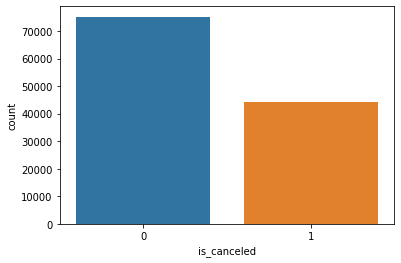

In [48]:
# Count of the cancelled bookings :
a = sns.countplot(x ='is_canceled', data = df) 
a

<AxesSubplot:xlabel='total_of_special_requests', ylabel='count'>

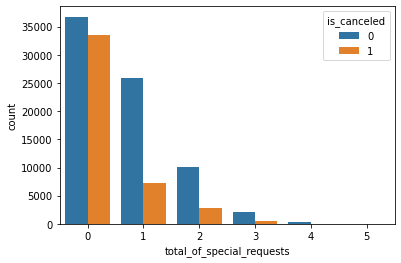

In [42]:
# Distribution of the cancelled bookings based on the number of special requests:
b = sns.countplot(x ='total_of_special_requests', hue ='is_canceled', data = df) 
b

<AxesSubplot:xlabel='hotel', ylabel='count'>

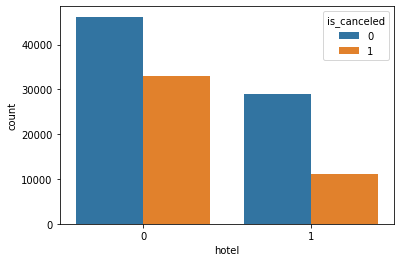

In [46]:
# Distribution of the cancelled bookings based on the hotel type:
c = sns.countplot(x ='hotel', hue ='is_canceled', data = df) 
c

<AxesSubplot:xlabel='booking_changes', ylabel='count'>

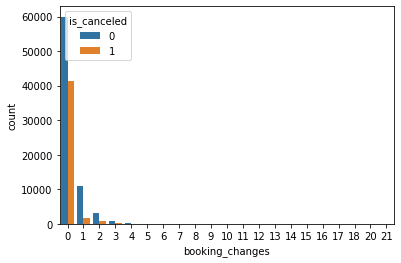

In [47]:
# Distribution of the cancelled bookings based on number of changes made on the booking:
d = sns.countplot(x ='booking_changes', hue ='is_canceled', data = df) 
d

In [50]:
# Dropping the 
df.drop(df.index[df['booking_changes'] >= 5], inplace = True)

<AxesSubplot:xlabel='booking_changes', ylabel='count'>

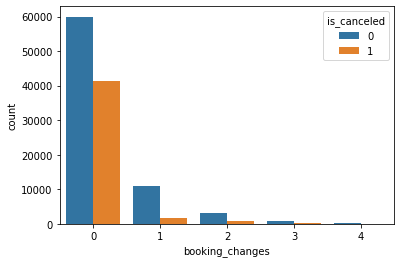

In [51]:
# we clear the graph by dropping the outliners:
d_clean = sns.countplot(x ='booking_changes', hue ='is_canceled', data = df) 
d_clean

<AxesSubplot:xlabel='adults', ylabel='count'>

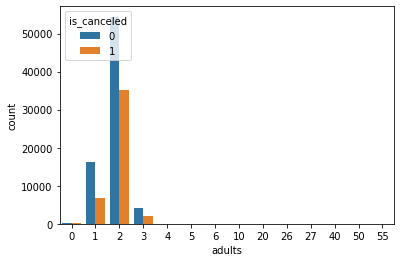

In [49]:
# Distribution of the cancelled bookings based on the number of adults per booking:
e = sns.countplot(x ='adults', hue ='is_canceled', data = df) 
e

In [52]:
# Dropping the 
df.drop(df.index[df['adults'] >= 5], inplace = True)

<AxesSubplot:xlabel='adults', ylabel='count'>

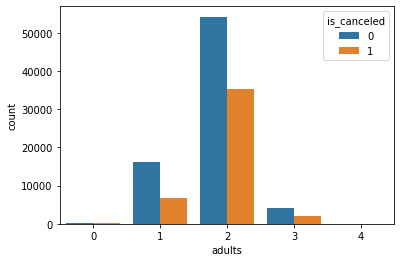

In [53]:
# graph after dropping the outliners:
e_clean = sns.countplot(x ='adults', hue ='is_canceled', data = df)
e_clean

<AxesSubplot:xlabel='customer_type', ylabel='count'>

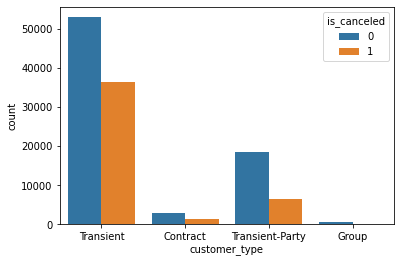

In [54]:
# Distribution of the cancelled bookings based on the guest type:
f = sns.countplot(x ='customer_type', hue ='is_canceled', data = df) 
f

### Visualization of Lead time  

<AxesSubplot:xlabel='lead_time', ylabel='count'>

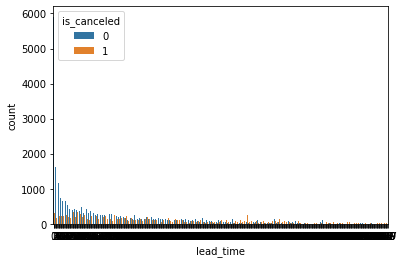

In [55]:
# Distribution of the cancelled bookings based on the lead time:
g = sns.countplot(x ='lead_time', hue ='is_canceled', data = df) 
g

In [90]:
#Simplifying the data by creating a dictionnay for range of lead time and adding a new colomn to our data base
lead_time_range_dictionnary = {}

In [91]:
for i in range (0,8):
    lead_time_range_dictionnary[i] = '0-7'

In [92]:
for i in range (8,16):
    lead_time_range_dictionnary[i] = '8-15'

In [93]:
for i in range (16,32):
    lead_time_range_dictionnary[i] = '16-31'

In [94]:
for i in range (32,94):
    lead_time_range_dictionnary[i] = '32-93'

In [95]:
for i in range (93,187):
    lead_time_range_dictionnary[i] = '94-186'

In [96]:
for i in range (186,366):
    lead_time_range_dictionnary[i] = '187-365'

In [97]:
for i in range (366,800):
    lead_time_range_dictionnary[i] = '365+'

In [98]:
df['lead_time_range'] = df['lead_time'].map(lead_time_range_dictionnary)

<AxesSubplot:xlabel='lead_time_range', ylabel='count'>

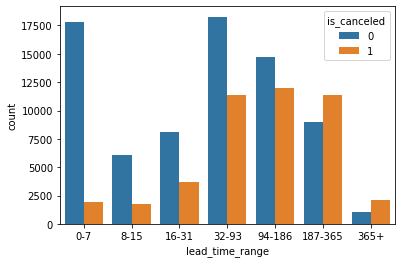

In [99]:
# Distribution of the cancelled bookings based on the lead time using the rages in number of days:
g_clean = sns.countplot(x ='lead_time_range', hue ='is_canceled',order=['0-7','8-15','16-31','32-93','94-186','187-365','365+'], data = df) 
g_clean

# Deploying Machine Learning

In [ ]:
# In order to deploy the machine learning algorythms we need to be sure to have all the dataset using numerical features
# We are trying to study the probality of a booking turned into a cancelled booking or a no show 
# Canceled status of a booking is expressed as categorical feature, this will allow us to use logistical regression and decision tree algoryths to calculate our predictions

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119107 entries, 0 to 119389
Data columns (total 16 columns):
 #   Column                          Non-Null Count   Dtype 
---  ------                          --------------   ----- 
 0   hotel                           119107 non-null  int32 
 1   is_canceled                     119107 non-null  int64 
 2   lead_time                       119107 non-null  int64 
 3   adults                          119107 non-null  int64 
 4   is_repeated_guest               119107 non-null  int64 
 5   previous_cancellations          119107 non-null  int64 
 6   previous_bookings_not_canceled  119107 non-null  int64 
 7   booking_changes                 119107 non-null  int64 
 8   days_in_waiting_list            119107 non-null  int64 
 9   customer_type                   119107 non-null  object
 10  total_of_special_requests       119107 non-null  int64 
 11  Contract                        119107 non-null  uint8 
 12  Group                         

In [ ]:
df.shape

In [ ]:
df.head(5)

In [ ]:
# We have to drop or convert the data that is not expressed in numbers: customer_type and lead_time_range 

In [105]:
df.drop(['customer_type'], axis='columns', inplace=True)

In [106]:
df.drop(['lead_time_range'], axis='columns', inplace=True)

In [ ]:
df.info()

In [ ]:
df.shape

In [ ]:
df.head(5)

## Logistical Regression

In [120]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

from sklearn.metrics import confusion_matrix 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import classification_report 

In [108]:
#features extraction
x=df[["lead_time", "previous_cancellations", "booking_changes", "total_of_special_requests", "Transient"]]
y=df["is_canceled"]

#splitting data with test size of 20%
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=40) 

logreg = LogisticRegression()   #build our logistic model
logreg.fit(x_train, y_train)  #fitting training data
y_pred  = logreg.predict(x_test)    #testing model’s performance

### Calculating accuracy and visualizing the model 

In [109]:
# Calculating accurancy using accuracy score:
print("Accuracy={:.2f}".format(accuracy_score(y_pred, y_test)))

Accuracy=0.75


In [ ]:
#Logistical regression visualization: Lead Time and cancellation status

sns.regplot(x='lead_time',y='is_canceled',data=df,logistic=True)

In [ ]:
#Logistical regression visualization: number of Booking changes and cancellation status: 

sns.regplot(x='booking_changes',y='is_canceled',data=df,logistic=True)

In [118]:
# Calculating accurancy using cross validation score:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(logreg, x, y, cv=10)
scores

array([0.65922257, 0.7295777 , 0.73948451, 0.68717992, 0.76248846,
       0.79271262, 0.65536059, 0.79739715, 0.81351805, 0.71460957])

In [119]:
scores = pd.Series(scores)
scores.min(), scores.mean(), scores.max()

(0.6553605910502897, 0.735155113128781, 0.8135180520570949)

In [ ]:
# with this model our min accuracy will be of 65%, Max accuracy of 81% and mean of accurancy in general: 74%

In [126]:
# Calculating accurancy using confusion matrix score:
confusion_matrix(y_test, y_pred)

array([[13471,  1495],
       [ 4397,  4459]], dtype=int64)

In [127]:
print ("Accuracy : ", accuracy_score(y_test,y_pred)*100) 

Accuracy :  75.26656032239106


In [132]:
print(classification_report(y_test, y_pred)) 

              precision    recall  f1-score   support

           0       0.75      0.90      0.82     14966
           1       0.75      0.50      0.60      8856

    accuracy                           0.75     23822
   macro avg       0.75      0.70      0.71     23822
weighted avg       0.75      0.75      0.74     23822



In [ ]:
# 0 = Booking made and guest arrived
# 1 = Booking was canceled or guest didn't show up

In [ ]:
# Based on Accuracy score: our model is accurate at 75%
# Based on Recall score: when predicting if a booking wil be cancelled we have 50% correct answers
# Based on Recall score: when predicting if a booking wil not be cancelled we have 90% correct answers 